In [4]:
import pandas as pd

dataset = pd.read_csv('arquivos/sub_dre_pivot.csv')
dataset

,Custo dos Bens e/ou Serviços Vendidos,Lucro/Prejuízo Consolidado do Período,Receita de Venda de Bens e/ou Serviços,Crescimento (%)
0,-2.944570e+08,1.104210e+08,2.530710e+08,NaN
1,-4.084680e+08,2.416220e+08,3.978710e+08,118.818884
2,-4.350640e+08,3.062700e+07,5.339220e+08,-87.324416
3,-5.288090e+08,2.048750e+08,8.489200e+08,568.935906
4,-9.403790e+08,8.423460e+08,1.644346e+09,311.151190
5,-1.286926e+09,4.529130e+08,1.904185e+09,-46.231952
6,-1.883358e+09,1.333046e+09,4.396003e+09,194.327167
7,-2.106303e+09,3.427072e+09,6.363475e+09,157.085802


In [5]:
dataset['Crescimento (%)'].mean()

np.float64(173.82322580401902)

In [6]:
dataset['Crescimento (%)'].mean()

np.float64(173.82322580401902)

In [7]:
import openai
from dotenv import load_dotenv, find_dotenv

_ = load_dotenv(find_dotenv())

client = openai.Client()

## Cria o assistant

In [8]:
file = client.files.create(
    file=open('arquivos/sub_dre_pivot.csv', 'rb'),
    purpose='assistants'
)

In [9]:
# file.id

In [10]:
assistant = client.beta.assistants.create(
    name="Analista Fianceiro",
    instructions="Você é um analista financeiro de mercado de ações. Você utiliza os dados .csv relativo ao DRE e Patrimonio liquido\
        da supermercado para realizar as suas análises",
    tools=[{'type': 'code_interpreter'}],
    tool_resources={'code_interpreter': {'file_ids': [file.id]}},
    # model='gpt-4o'
    model='gpt-3.5-turbo-0125'
)


# ```python
# assistant = client.beta.assistants.create(
# ```
# - **Propósito:** Esta linha inicia a criação de um novo assistente usando o método `client.beta.assistants.create`.
# - **Explicação:** O objeto `assistant` armazenará a instância do assistente que você está criando. Este é tipicamente o primeiro passo para configurar um assistente personalizado usando uma API.

# ```python
#     name="Analista Fianceiro",
# ```
# - **Propósito:** Especifica o nome do assistente.
# - **Explicação:** Aqui, você está nomeando o assistente como "Analista Financeiro". Este nome é útil para identificar o assistente dentro do seu projeto ou aplicação.

# ```python
#     instructions="Você é um analista financeiro de um supermercado. Você utiliza os dados .csv relativo às vendas \
#         do supermercado para realizar as suas análises",
# ```
# - **Propósito:** Fornece instruções para o assistente.
# - **Explicação:** Esta string dá contexto e orientação ao assistente sobre como ele deve se comportar. Você está instruindo o assistente a agir como um analista financeiro de um supermercado e a utilizar dados em formato CSV relacionados às vendas para realizar suas análises. A barra invertida (`\`) no final da linha permite que a string continue na próxima linha sem quebrar o código.

# ```python
#     tools=[{'type': 'code_interpreter'}],
# ```
# - **Propósito:** Especifica as ferramentas que o assistente deve ter acesso.
# - **Explicação:** Aqui, você está dando ao assistente acesso a uma ferramenta chamada `code_interpreter`. Esta é uma ferramenta especializada que permite ao assistente executar código, tipicamente para realizar análises de dados, cálculos ou outras tarefas programáveis.

# ```python
#     tool_resources={'code_interpreter': {'file_ids': [file.id]}},
# ```
# - **Propósito:** Vincula recursos (como arquivos) às ferramentas especificadas.
# - **Explicação:** Esta linha está associando um arquivo à ferramenta `code_interpreter`. O parâmetro `file_ids` contém uma lista de IDs de arquivos que o interpretador de código pode usar. O `file.id` provavelmente é o ID do arquivo CSV que você carregou ou criou anteriormente. Isso permite que o interpretador de código acesse os dados nesse arquivo durante as operações do assistente.

# ```python
#     model='gpt-4o'
# ```
# - **Propósito:** Especifica o modelo que o assistente usará.
# - **Explicação:** O assistente está configurado para usar o modelo `gpt-4o`, que é uma variante específica do modelo GPT-4. Esta versão do modelo provavelmente é otimizada ou adaptada para casos de uso específicos, embora mais informações sejam necessárias para explicar completamente suas características.

# No geral, este bloco de código configura um assistente personalizado para atuar como um analista financeiro usando o modelo GPT-4o, com ferramentas e recursos específicos disponíveis para realizar tarefas como a análise de dados de vendas de um supermercado a partir de um arquivo CSV.

In [11]:
# assistant = client.beta.assistants.create(
#     name="Analista Fianceiro Supermercados Asimov",
#     instructions="Você é um analista financeiro de um supermercado. Você utiliza os dados .csv relativo às vendas \
#         do supermercado para realizar as suas análises",
#     tools=[{'type': 'code_interpreter'}],
#     file_ids=[file.id],
#     model='gpt-4-turbo-preview'
# )

## Cria uma thread

In [12]:
thread = client.beta.threads.create()

## Adiciona mensagem a thread criada

In [13]:
pergunta = 'Qual é o Crescimento (%) médio da prio?'
# pergunta = 'Gere um gráfico de pizza com o Lucro/Prejuízo Consolidado dos Períodos'

messages = client.beta.threads.messages.create(
    thread_id=thread.id,
    role='user',
    content= pergunta
)

In [14]:
pergunta

'Qual é o Crescimento (%) médio da prio?'

## Roda a thread no assistant

In [15]:
run = client.beta.threads.runs.create(
    thread_id=thread.id,
    assistant_id=assistant.id,
    instructions='O nome do usuário é Sergio.'
)

## Aguarda a thread rodar

In [16]:
import time

while run.status in ['queued', 'in_progress', 'cancelling']:
    time.sleep(1)
    run = client.beta.threads.runs.retrieve(
        thread_id=thread.id,
        run_id=run.id
    )

print(run.status)

completed


## Verifica a resposta

In [17]:
if run.status == 'completed':
    messages = client.beta.threads.messages.list(
        thread_id=thread.id
    )
    print(messages)
else:
    print('Erro', run.status)

SyncCursorPage[Message](data=[Message(id='msg_GdO3gYW07Hhy8L51hcCmHp9V', assistant_id='asst_9Y6rAzmQE51qnAjm56A7OPMr', attachments=[], completed_at=None, content=[TextContentBlock(text=Text(annotations=[], value='O crescimento médio da Receita de Venda de Bens e/ou Serviços da Prio é de aproximadamente 173.82%. Se precisar de mais alguma informação ou análise, por favor me avise!'), type='text')], created_at=1724248965, incomplete_at=None, incomplete_details=None, metadata={}, object='thread.message', role='assistant', run_id='run_7OyKDUTAhitjCvm9rx0jioz8', status=None, thread_id='thread_6BQjgrZxQNBtEn5gOtqhzolV'), Message(id='msg_PG9zWBCOc68G8CrqubCb15fw', assistant_id='asst_9Y6rAzmQE51qnAjm56A7OPMr', attachments=[], completed_at=None, content=[TextContentBlock(text=Text(annotations=[], value='Os dados contêm diversas colunas, incluindo "Receita de Venda de Bens e/ou Serviços" e "Crescimento (%)". Vou calcular o crescimento médio da receita de vendas da prio. Para fazer isso, primeiro

In [18]:
print(messages.data[0].content[0])

TextContentBlock(text=Text(annotations=[], value='O crescimento médio da Receita de Venda de Bens e/ou Serviços da Prio é de aproximadamente 173.82%. Se precisar de mais alguma informação ou análise, por favor me avise!'), type='text')


In [19]:
print(messages.data[0].content[0].text)

Text(annotations=[], value='O crescimento médio da Receita de Venda de Bens e/ou Serviços da Prio é de aproximadamente 173.82%. Se precisar de mais alguma informação ou análise, por favor me avise!')


# grafico

In [20]:
# grafico

pergunta = 'Gere um gráfico de pizza com o Lucro/Prejuízo Consolidado dos Períodos onde o index 0 é o ano de 2016 e o index 1 é o ano de 2017 e assim em diante e faça um comentário sobre o ano mais representativo quando se olha o lucro do período todo'

messages = client.beta.threads.messages.create(
    thread_id=thread.id,
    role='user',
    content= pergunta
)

pergunta
run = client.beta.threads.runs.create(
    thread_id=thread.id,
    assistant_id=assistant.id,
    instructions='O nome do usuário é Sergio.'
)
import time

while run.status in ['queued', 'in_progress', 'cancelling']:
    time.sleep(1)
    run = client.beta.threads.runs.retrieve(
        thread_id=thread.id,
        run_id=run.id
    )

print(run.status)

completed


## Analisando os passos do modelo

In [21]:
run_steps = client.beta.threads.runs.steps.list(
  thread_id=thread.id,
  run_id=run.id
)

======= Step > message_creation
Para criar um gráfico de pizza com o Lucro/Prejuízo Consolidado dos Períodos, considerando o ano de 2016 como o index 0, o ano de 2017 como o index 1 e assim por diante, vou realizar os seguintes passos:

1. Filtrar os dados relevantes.
2. Criar um gráfico de pizza com os valores do Lucro/Prejuízo Consolidado dos Períodos.
3. Fazer um comentário sobre o ano mais representativo considerando o lucro do período todo.

Vamos começar gerando o gráfico de pizza com os dados fornecidos.
======= Step > tool_calls
```
import matplotlib.pyplot as plt

# Filtrar os dados relevantes
profit_loss = data['Lucro/Prejuízo Consolidado do Período']

# Criar um gráfico de pizza com o Lucro/Prejuízo Consolidado dos Períodos
fig, ax = plt.subplots()
ax.pie(profit_loss, labels=data.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.title('Lucro/Prejuízo Consolidado dos Períodos')
plt.show()
```
======= Ste

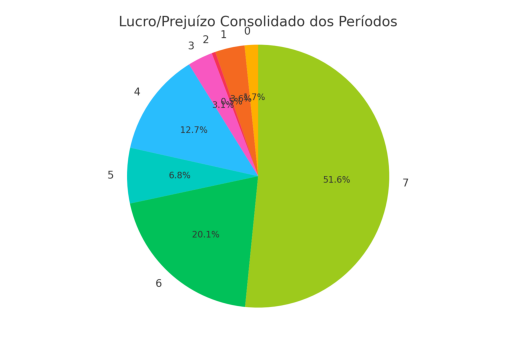

======= Step > tool_calls
```
# Calcular o lucro/prejuízo total de cada ano
total_profit_loss = data['Lucro/Prejuízo Consolidado do Período'].sum()

# Identificar o ano mais representativo considerando o lucro/prejuízo total
most_representative_year = data['Lucro/Prejuízo Consolidado do Período'].idxmax()

most_representative_year, total_profit_loss.loc[most_representative_year]
```
======= Step > message_creation
Parece que houve um erro ao tentar recuperar o lucro/prejuízo do ano mais representativo. Vou corrigir esse erro e recalcular a informação. Vamos lá!
======= Step > tool_calls
```
# Identificar o ano mais representativo considerando o lucro/prejuízo total
most_representative_year = data['Lucro/Prejuízo Consolidado do Período'].idxmax()

most_representative_year, total_profit_loss
```
======= Step > message_creation
O ano mais representativo, considerando o lucro/prejuízo total, é o index 7. No entanto, ao verificar os valores totais, observamos que o lucro/prejuízo total de t

In [23]:
for step in run_steps.data[::-1]:
    print('======= Step >', step.step_details.type)
    if step.step_details.type == 'tool_calls':
        for tool_call in step.step_details.tool_calls:
            print('```')
            print(tool_call.code_interpreter.input)
            print('```')
            if tool_call.code_interpreter.outputs and tool_call.code_interpreter.outputs[0].type == 'logs':
                print('Result')
                print(tool_call.code_interpreter.outputs[0].logs)
    if step.step_details.type == 'message_creation':
        message = client.beta.threads.messages.retrieve(
            thread_id=thread.id,
            message_id=step.step_details.message_creation.message_id
        )
        if message.content[0].type == 'text':
            print(message.content[0].text.value)

        if message.content[0].type == 'image_file':
            file_id = message.content[0].image_file.file_id
            image_data = client.files.content(file_id)

            with open(f'arquivos/{file_id}.png', 'wb') as file:
                file.write(image_data.read())

            import matplotlib.pyplot as plt
            import matplotlib.image as mpimg

            img = mpimg.imread(f'arquivos/{file_id}.png')
            fig, ax = plt.subplots()
            ax.set_axis_off()
            ax.imshow(img)
            plt.show()